
**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2022**

**Exploración y Curación de Datos**


**Grupo 28** <br>
Docente: Laura Montes<br>

Integrantes:
*   Gustavo Alvarez Lupu
*   Laura Hayas
*   Maria Emilia Santacruz
*   Nicolás Ambrosis

---

# Trabajo práctico entregable - Parte 2

In [ ]:
# Libraries
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
pd.set_option('display.float_format', '{:,.2f}'.format)
import seaborn as sns
sns.set_context('talk') 
import math
import scipy
import scipy.stats as stats
from scipy.stats import ttest_ind
from statsmodels.stats.power import tt_ind_solve_power



## Lectura del dataset
Vamos a utilizar la encuesta realizada en el anio 2020.

In [ ]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [ ]:
print(f'DataSet\n Filas: {df.shape[0]}\n Columnas: {df.shape[1]}')

DataSet
 Filas: 6095
 Columnas: 48


In [ ]:
df.head()

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.00,3.00,3.00,0,Universitario,En curso,...,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.00,2.00,2.00,4,Universitario,En curso,...,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.00,0.00,0.00,0,Secundario,Completado,...,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN
3,Hombre,39,Argentina,Corrientes,15.00,15.00,13.00,5,Posgrado,Incompleto,...,En mi trabajo actual,Heterosexual,NaN,NaN,501-1000,Otras industrias,7,6,"Abono de celular, Capacitaciones y/o cursos, C...",NaN
4,Hombre,32,Argentina,Ciudad Autónoma de Buenos Aires,9.00,6.00,6.00,0,Universitario,En curso,...,Jamás,Heterosexual,NaN,NaN,11-50,Servicios / Consultoría de Software / Digital,6,6,"Clases de idiomas, Horarios flexibles, Vacacio...",NaN


In [ ]:
df.tail()

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
6090,Hombre,37,Argentina,Ciudad Autónoma de Buenos Aires,13.00,6.00,6.00,0,Terciario,Completado,...,En mi trabajo actual,Heterosexual,NaN,No,501-1000,Otras industrias,7,8,Viáticos,NaN
6091,Hombre,38,Argentina,Ciudad Autónoma de Buenos Aires,12.00,5.00,5.00,0,Universitario,En curso,...,Jamás,Heterosexual,NaN,NaN,2001-5000,Otras industrias,8,10,"Abono de celular, Capacitaciones y/o cursos, D...",NaN
6092,Hombre,24,Argentina,Ciudad Autónoma de Buenos Aires,2.00,2.00,2.00,0,Terciario,En curso,...,Jamás,Heterosexual,NaN,NaN,201-500,Producto basado en Software,7,9,"Capacitaciones y/o cursos, Clases de idiomas, ...",Mercado Libre
6093,Hombre,28,Argentina,La Pampa,5.00,3.00,2.00,0,Terciario,En curso,...,Jamás,Heterosexual,NaN,No,51-100,Servicios / Consultoría de Software / Digital,5,7,Capacitaciones y/o cursos,Solo Nubity
6094,Hombre,33,Argentina,GBA,5.00,5.00,3.00,0,Terciario,Incompleto,...,Jamás,Heterosexual,no,No,501-1000,Otras industrias,9,7,"Abono de celular, Comidas pagas / subvencionadas",NaN


In [ ]:
df[['profile_gender', 'salary_monthly_NETO']].groupby('profile_gender').describe()
# vemos que hay los valores minimos de la columna salarios son $1 (hombres), $ 2 (mujeres) y $ 40 (otros).
# vamos a filtrar el dataset para elimar datos que parecen estar mal ingresados.
#tb tenemos que sacar los sueldos mayores a 1000000

salary_monthly_NETO                                       \
                             count      mean        std   min       25%   
profile_gender                                                            
Hombre                    4,944.00 98,836.06 102,159.66  1.00 53,285.00   
Mujer                       908.00 73,501.41  56,256.88  2.00 43,818.00   
Otros                        31.00 95,441.35  88,635.67 40.00 39,500.00   

                                                  
                     50%        75%          max  
profile_gender                                    
Hombre         80,000.00 110,000.00 2,080,000.00  
Mujer          65,000.00  92,000.00   800,000.00  
Otros          74,000.00 117,500.00   380,000.00

Vamos aplicar un filtro a la columna 'salary_monthly_NETO' para eliminar los datos inferiores a $18.900 tal como explicamos en el Entregable 01 ese era el monto del salario minimo vital y movil para el periodo en que se realizo la encuesta por lo cual consideramos que podria ser un buen parametro para filtrar el dataset y eliminar del analisis las entradas asociadas a salarios extremadamente bajos y probablemente mal ingresados.
Ademas eliminamos los salarios superiores a 1000000


In [ ]:
# aplicamos el filtro al dataset
condition_1 = df.salary_monthly_NETO > 18900
condition_2 = df.salary_monthly_NETO <= 1000000

df_filtered = df[condition_1 & condition_2] 
df_filtered[['profile_gender', 'salary_monthly_NETO']].groupby('profile_gender').describe()

# confirmamos que luego de aplicar el filtro los salarios minimos son superiores al valor del salario_mvm

salary_monthly_NETO                                           \
                             count       mean       std       min       25%   
profile_gender                                                                
Hombre                    4,747.00 100,465.75 87,043.60 19,000.00 56,287.50   
Mujer                       848.00  78,487.33 54,865.09 20,000.00 49,000.00   
Otros                        28.00 105,660.71 87,235.71 34,000.00 43,750.00   

                                                  
                     50%        75%          max  
profile_gender                                    
Hombre         80,900.00 110,000.00 1,000,000.00  
Mujer          68,000.00  94,000.00   800,000.00  
Otros          78,900.00 122,750.00   380,000.00

In [ ]:
print(f'DataSet\n Filas: {df_filtered.shape[0]}\n Columnas: {df.shape[1]}')
# Vemos que se filtraron 464 entradas correspondientes con salarios menores a $18.900

DataSet
 Filas: 5623
 Columnas: 48


## Ejercicio 1: Estimación

**Consigna:**  Calcular una estimación puntual y un intervalo de confianza de nivel (1-alpha) para la resta entre la media del salario Neto para Hombres menos la media del salario Neto para otros géneros(diferencia de las medias entre el grupoA y grupoB). 
¿Cómo se relaciona este intervalo de confianza con el test de hipótesis?

In [ ]:
# Dividimos el dataset por géneros: Hombres en un grupo, y mujeres y otros en otro grupo
is_man = df_filtered.profile_gender == 'Hombre' 

groupA = df_filtered[is_man].salary_monthly_NETO
groupB = df_filtered[~is_man].salary_monthly_NETO

In [ ]:
print(type(groupA))
print(type(groupB))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


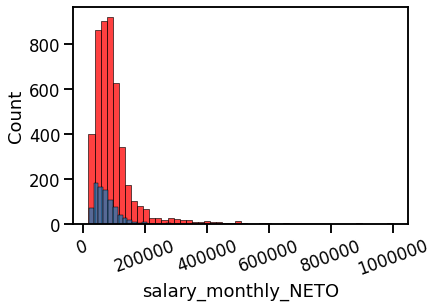

In [ ]:
#Visualizamos la distribución del salario y la cantidad de miembros de cada grupo. En rojo vemos la informaciòn de Hombres(groupA), en azul Mujeres y otros(groupB)
sns.histplot(groupA, bins=50, color="red")
sns.histplot(groupB, bins=50)
plt.xticks(rotation=20)
# Remove scietific notation
plt.ticklabel_format(useOffset=False, style='plain')

(0.0, 500000.0)

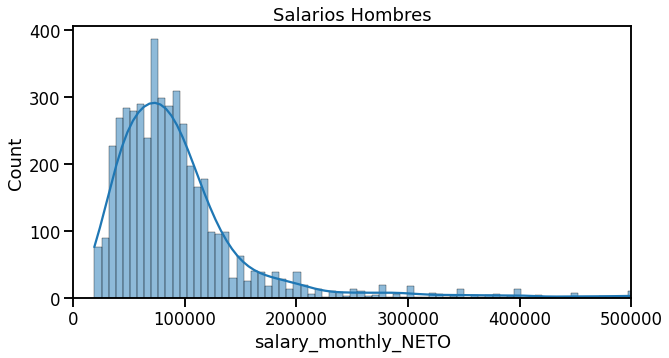

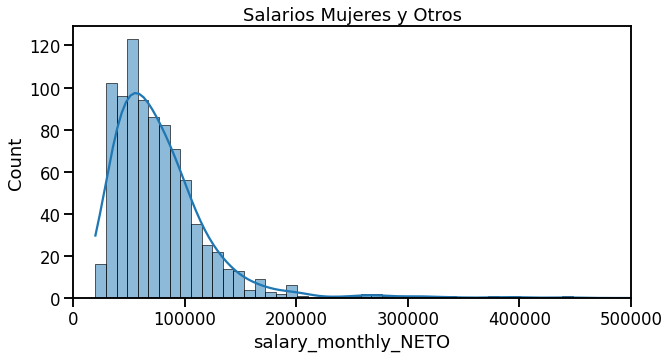

In [34]:
plt.figure(figsize=(10, 5))
sns.histplot(data=groupA, kde=True)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Salarios Hombres')
plt.xlim([0,500000])
plt.figure(figsize=(10, 5))
sns.histplot(data=groupB, kde=True)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Salarios Mujeres y Otros')
plt.xlim([0,500000])

In [ ]:
groupA_mean = groupA.mean()
groupA_std = groupA.std()
groupA_var = groupA.var()
print(f'Sueldo promedio Hombres = ${round(groupA_mean,2)}')
print(f'Std sueldo hombres = ${round(groupA_std,2)}')
print(f'Var sueldo hombres = ${round(groupA_var,2)}')

print('\n-----\n')

groupB_mean = groupB.mean()
groupB_std = groupB.std()
groupB_var = groupB.var()
print(f'Sueldo promedio Mujeres y otros = ${round(groupB_mean,2)}')
print(f'Std sueldo Mujeres y otros = ${round(groupB_std,2)}')
print(f'Var sueldo Mujeres y otros = ${round(groupB_var,2)}')


Sueldo promedio Hombres = $100465.75
Std sueldo hombres = $87043.6
Var sueldo hombres = $7576587857.24

-----

Sueldo promedio Mujeres y otros = $79355.88
Std sueldo Mujeres y otros = $56316.53
Var sueldo Mujeres y otros = $3171551196.51


### ¿Las varianzas son iguales?

In [ ]:
groupA_var - groupB_var
# a priori todo sugiere que las varianzas de los grupos no son iguales.
# vamos a realizar el test de Bartlett para confirmarlo

4405036660.726465

### Test de Bartlett
Para analizar si las varianzas de las poblaciones (Hombres y otros) son iguales o diferentes podemos utilizar el test de Bartlett

In [ ]:
# H0 = Los grupos tienen varianzas iguales
# H1 = Los grupos NO tienen varianzas iguales (o lo que es equivalente, los grupos tienen varianzas diferentes)
stats.bartlett(groupA, groupB)



BartlettResult(statistic=228.6596122142148, pvalue=1.1685907552864991e-51)

### Conclusion
Dado que pvalue=1.0205104865339914e-44 (p<0.05). Estamos en condiciones de rechazar H0. Por lo tanto los grupos NO tienen varianzas iguales.
Por lo tanto no seria correcto aplicar el metodo de pivote para calcular el intervalo de confianza para la diferencia entre la media del salario de hombres y otros generos.

---


### Estimacion puntual

In [ ]:
# diferencia entre salario promedio de hombres y otros generos (mujeres y otros)
dif_salario = groupA_mean - groupB_mean
print(f'Estimacion puntual de la diferencia entre salario de Hombres y Otros generos: \n${round(dif_salario,2)}')

Estimacion puntual de la diferencia entre salario de Hombres y Otros generos: 
$21109.86


### Intervalo de confianza<br>
Como vimos precedentemente, las varianzas no son iguales. A su vez, tenemos 2 poblaciones distintas con distinta cantidad de muestras cada una. Por ello vamos a aplicar el Método del Welch.

In [ ]:
dif_salario

21109.864422497543

In [ ]:
n1 = groupA.count()
n2 = groupB.count()
print(n1,n2)


4747 876


No existe una igualdad entre medias de sueldos para Hombres, respecto a los otros géneros. En ese caso, se utiliza Método de Welch: el estadístico t de student con k grados de libertad.

In [ ]:
#Cálculo de los grados de libertad correspondientes al Test de Welch 
gl =  (((groupA_var)/n1  + (groupB_var)/n2)**2) / (((groupA_var/n1)**2 /(n1-1)) + ((groupB_var/n2)**2 /(n2-1)))
print("Grados de libertad:", gl)

Grados de libertad: 1753.6963365746083


In [ ]:
# Calculamos el estadístico
aplha = 0.05
t_ic = scipy.stats.t.ppf((1 - alpha/2),gl)
print(f't_ic = {round(t,2)}')

t = 1.96


In [ ]:
# Calculamos el intervalo de confienza para la diferencia de muestras

# https://statologos.com/diferencia-de-intervalo-de-confianza-entre-medias/

IC_inferior = dif_salario - t * (math.sqrt((groupA_var/n1)+(groupB_var/n2)))
IC_superior = dif_salario + t * (math.sqrt((groupA_var/n1)+(groupB_var/n2)))
print(f'Intervalo de confianza >> [{round(IC_inferior,2)} , {round(IC_superior,2)}]')


Intervalo de confianza >> [16630.25 , 25589.48]


# Conclusion
Segun este resultado, asuminedo que las varianzas de los dos grupos muestrales no son iguales,
la diferencia entre el sueldo promedio de hombres y otros esta dentro del intervalo [16630.25 , 25589.48] con un nivel de confianza del 95%.
Existe una probabilidad del 95% de que el intervalo de confianza de [16630.25 , 25589.48] contenga la verdadera diferencia en el salario neto entre los dos grupos.<br>
Dado que este intervalo contiene el valor «0», significa que es posible que haya diferencia en el salario medio entre los gos grupos. En otras palabras, podemos decir con un 95% de confianza que existe una diferencia en el salario medio entre los grupos analizados.




---

## Ejercicio 2: Test de hipótesis



### 2.1 Formalización

Describir formalmente los distintos componentes de un test de hipótesis para comprobar si la distribución de los salarios es distinta entre los grupos A y B.



**1 - Hipótesis**

**H0 = La media del sueldo de los hombres es igual a la media del sueldo de mujeres y otros\**

H0: μ groupA = μ groupB

**H1 = La media del sueldo de los hombres es distinta a la media del sueldo de mujeres y otros\**

H0: μ groupA ≠ μ groupB

**2 - Nivel de significancia del Test**

alpha = 0.05

**3 - Estadístico (Pivote)**
 
Trabajamos con la media de los sueldos de ambos grupos. El estadístico (Pivote) aplicable al caso de análisis es el estadístico t de student con k grados de libertad (Método de Welch).

**Estadístico de prueba: ( x 1 – x 2 ) / (√ s 1 2 / n 1 + s 2 2 / n 2 )**

**Grados de libertad: (s 1 2 / n 1 + s 2 2 / n 2 ) 2 / {[(s 1 2 / n 1 ) 2 / (n 1 – 1)] + [(s 2 2 / n 2 ) 2 / (n 2 – 1)]}**

**Regla de decisión:** Si el p_valor es > al alpha: ACEPTAMOS la H0, en su defecto se RECHAZA.


### 2.2 P-valor

1. Calcule el p-valor y decida si rechazar o no la hipótesis nula.
2. Interprete el resultado.

Links útiles:
* [Test de hipótesis usando scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)
* [Test de Welch](http://daniellakens.blogspot.com/2015/01/always-use-welchs-t-test-instead-of.html)

### Test de Shapiro
Vamos a utilizar el test de Shapiro para determinar si las muestras de sueldos de los dos grupos tiene o no distribucion normal

In [31]:
# test de Shapiro para determinar si la muestra de sueldos de hombres tiene distribucion normal  
stats.shapiro(groupA)

# El resultado se lee asi (estadistico W, p-value).
# Como el p-value es menor a 0,05 podemos afirmar que la muestra no tiene distribucion normal


ShapiroResult(statistic=0.6001437902450562, pvalue=0.0)

In [32]:
# test de Shapiro para determinar si la muestra de sueldos de otros tiene distribucion normal
stats.shapiro(groupB)

# El resultado se lee asi (estadistico W, p-value).
# Como el p-value es menor a 0,05 podemos afirmar que la muestra no tiene distribucion normal

ShapiroResult(statistic=0.6167652606964111, pvalue=3.4045386969850026e-40)

En ambos casos, el p-value es menor a 0,05. Por lo tanto podemos inferir, con nivel de confianza del 95% que las dos muestras no tienen distribucion normal.

## Test de Welch

Se aplica en este caso, el Test de Welch debido a que estamos ante muestras de distinto tamaño, con varianzas diferentes. Al definir equal_var = False en el algoritmo, se trabaja con esta premisa.

In [33]:
# El test de Welch se aplica usando .ttest_ind(equal_var = False)
stats.ttest_ind(groupA, groupB, equal_var = False)

# como el p-value<0.05 podemos rechazar H0 (los sueldos de los dos grupos son iguales) y quedarnos con H1 (los sueldos de ambos grupos son diferentes)

Ttest_indResult(statistic=9.242572493015457, pvalue=6.749628469422985e-20)

### Conclusion Final
Como puede observarse, el p-value es menor a 0,05. De acuerdo a las reglas de decisión planteadas anteriormente, se RECHAZA la hipótesis nula que establecía que 'La media del sueldo de los hombres es igual a la media del sueldo de mujeres y otros'. En consecuencia, podemos inferir con un 95% de confianza que la media del salario de hombres no es igual a la media del salario de mujeres y otros géneros.

---